In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

In [2]:
df = pd.read_csv("/home/mbc/thesissatria/Dataset/CICIOT2023 10%.csv")

In [3]:
print("Jumlah data:", df.shape)
print("Jumlah kelas unik:", df['Attack Type'].nunique())
print("Distribusi kelas:\n", df['Attack Type'].value_counts())

Jumlah data: (4644785, 47)
Jumlah kelas unik: 9
Distribusi kelas:
 Attack Type
DDoS              3380228
DoS                805164
Mirai              262018
BENIGN             109198
Network Attack      53730
Recon               31737
Brute Force          1288
Injection            1114
Malware               308
Name: count, dtype: int64


In [4]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 1016288


In [5]:
print("Jumlah missing value per kolom:\n", df.isnull().sum())

Jumlah missing value per kolom:
 flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
A

In [6]:
df_clean = df.drop_duplicates().dropna()
print("Shape sesudah cleaning:", df_clean.shape)

Shape sesudah cleaning: (3628497, 47)


In [7]:
print('Nama Kolom :')
print(df_clean.columns)

Nama Kolom :
Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight',
       'Attack Type'],
      dtype='object')


In [8]:
print("Jumlah data Clean:", df_clean.shape)
print("Jumlah kelas unik Clean:", df_clean['Attack Type'].nunique())
print("Distribusi kelas Clean:\n", df_clean['Attack Type'].value_counts())

Jumlah data Clean: (3628497, 47)
Jumlah kelas unik Clean: 9
Distribusi kelas Clean:
 Attack Type
DDoS              2450879
DoS                737933
Mirai              242315
BENIGN             109198
Network Attack      53730
Recon               31732
Brute Force          1288
Injection            1114
Malware               308
Name: count, dtype: int64


In [9]:
X = df_clean.drop(['Attack Type'], axis=1)
y = df_clean['Attack Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
size = len(X.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(X_scaled, len(X) // 500):
    ipca.partial_fit(batch)

transformed_features = ipca.transform(X_scaled)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = y.values

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 95.59%


In [11]:
print("Dataset Baru yang Sudah Mengalami PCA:\n")
new_data

Dataset Baru yang Sudah Mengalami PCA:



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,Attack Type
0,2.708582,-1.826563,-2.469660,0.375554,0.104344,0.599845,-0.411175,-0.014532,0.685340,-1.041106,...,-0.001900,0.003804,-0.045737,-0.012105,0.298872,-0.090867,0.468791,0.406765,0.027849,Mirai
1,-1.654354,6.564882,-3.207039,0.405542,0.006955,0.156940,-0.117294,0.003253,0.244667,0.073049,...,-0.009672,-0.004924,-0.033778,-0.100352,-0.433227,-0.136730,0.164620,-0.101254,0.053182,DDoS
2,3.034333,-2.186360,-3.299877,0.377983,0.157512,1.494225,-0.494273,-0.054784,1.089249,-2.759701,...,-0.003029,0.007474,-0.123110,-0.029163,0.192558,1.005967,0.096260,-1.649301,-0.658027,Mirai
3,-0.652752,0.334991,1.595468,-0.654361,0.024098,-2.353423,-0.790792,-0.015011,-2.186831,-2.685663,...,-0.012131,0.011507,-0.090158,-0.137013,-0.890232,-0.307990,0.369506,0.092476,-0.192377,DDoS
4,-1.163403,0.062631,1.613862,-0.351167,0.008633,1.396553,0.345567,-0.034341,0.622022,-0.093092,...,-0.004914,-0.008658,-0.028493,-0.070946,-0.478776,-0.168040,0.090526,-0.176605,0.194629,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628492,-0.652785,0.334972,1.595388,-0.654836,0.024096,-2.353234,-0.791338,-0.015007,-2.186913,-2.685559,...,-0.012132,0.011506,-0.090152,-0.137012,-0.890240,-0.308014,0.369486,0.092480,-0.192380,DDoS
3628493,-0.042564,0.792996,2.247429,-1.129876,0.032822,-2.898702,-0.786649,0.000415,-1.646423,-2.432931,...,-0.040846,-0.007070,-0.290491,-0.305975,-0.016369,2.593052,-0.837861,1.371357,-0.909908,DDoS
3628494,-0.984141,0.091224,1.635666,-0.347460,-0.002303,1.374498,0.355085,-0.030313,0.571884,-0.023518,...,-0.004446,-0.006496,-0.038428,-0.062392,-0.283456,-0.419936,-0.046176,-0.130713,0.227044,DDoS
3628495,-0.707545,-1.393870,-1.091486,0.591261,0.032738,-0.671319,-0.267359,0.029417,0.371011,0.409549,...,-0.003872,-0.015076,0.074441,0.023363,0.107173,-0.370833,-0.220034,0.315406,-0.220330,DDoS


In [12]:
print("Explained Variance per Component:")
for i, var in enumerate(ipca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

print(f"\nTotal Variansi Dijelaskan: {sum(ipca.explained_variance_ratio_):.2%}")

Explained Variance per Component:
PC1: 19.12%
PC2: 8.83%
PC3: 7.41%
PC4: 7.01%
PC5: 6.11%
PC6: 4.93%
PC7: 4.49%
PC8: 4.13%
PC9: 4.09%
PC10: 3.82%
PC11: 2.82%
PC12: 2.37%
PC13: 2.28%
PC14: 2.27%
PC15: 2.27%
PC16: 2.27%
PC17: 2.27%
PC18: 2.25%
PC19: 2.00%
PC20: 1.40%
PC21: 1.23%
PC22: 1.15%
PC23: 1.05%

Total Variansi Dijelaskan: 95.59%


In [13]:
# Menampilkan bobot (loading) semua fitur terhadap PC1
pc1_loadings = ipca.components_[0]  # Baris pertama adalah PC1
# Misal features.columns adalah list nama fitur asli
pc1_df = pd.DataFrame({
    'Feature': X.columns,
    'PC1_Weight': pc1_loadings
}).sort_values(by='PC1_Weight', key=abs, ascending=False)

print(pc1_df)


            Feature    PC1_Weight
35              Max  3.226551e-01
36              AVG  3.193463e-01
33          Tot sum  3.151596e-01
41         Magnitue  3.089466e-01
37              Std  3.069166e-01
42           Radius  3.068204e-01
38         Tot size  3.065676e-01
44         Variance  2.488081e-01
43       Covariance  2.166817e-01
34              Min  2.049779e-01
18        rst_count  1.895793e-01
1     Header_Length  1.837313e-01
20            HTTPS  1.471713e-01
3          Duration  1.439291e-01
17        urg_count  1.283050e-01
11  ack_flag_number  1.196377e-01
8   syn_flag_number -6.831856e-02
2     Protocol Type  6.562915e-02
9   rst_flag_number -4.681154e-02
7   fin_flag_number -4.677764e-02
39              IAT  4.282734e-02
45           Weight  4.134194e-02
40           Number  4.131796e-02
14        ack_count -4.018288e-02
16        fin_count -3.438295e-02
26              TCP -3.056969e-02
27              UDP -2.205358e-02
30             ICMP -7.598633e-03
10  psh_flag_n

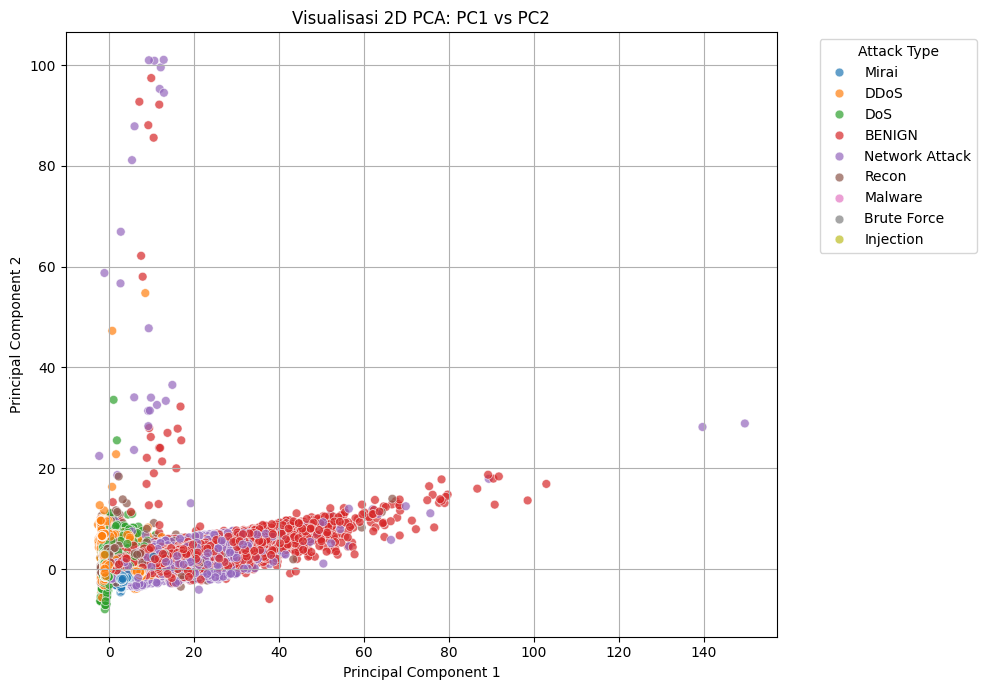

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=new_data,
    x='PC1', y='PC2',
    hue='Attack Type',
    palette='tab10',
    alpha=0.7,
    s=40
)
plt.title('Visualisasi 2D PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


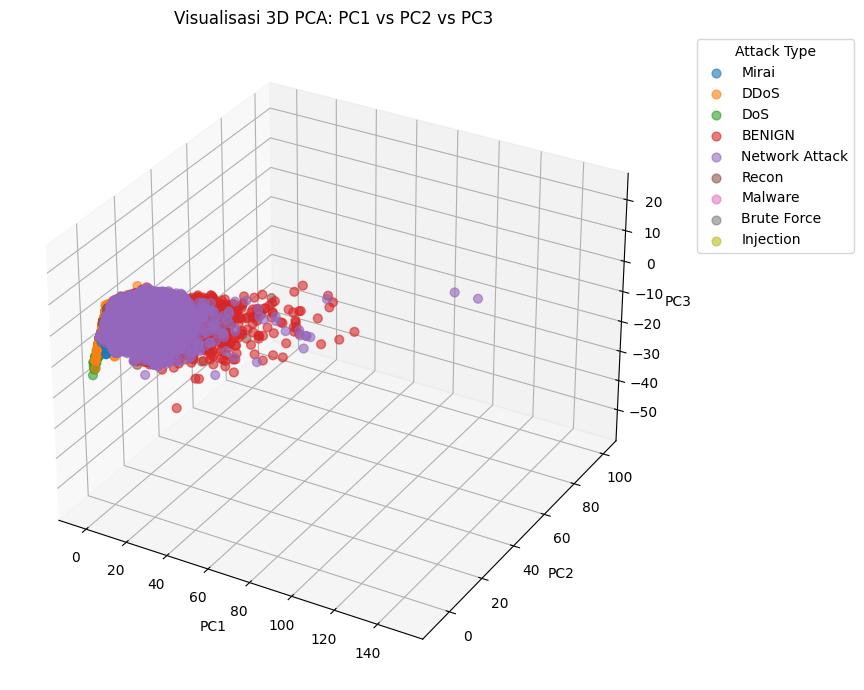

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Ambil warna unik untuk setiap label
labels = new_data['Attack Type'].unique()
colors = cm.tab10.colors

for i, label in enumerate(labels):
    subset = new_data[new_data['Attack Type'] == label]
    ax.scatter(
        subset['PC1'], subset['PC2'], subset['PC3'],
        label=label,
        color=colors[i % len(colors)],
        alpha=0.6,
        s=40
    )

ax.set_title('Visualisasi 3D PCA: PC1 vs PC2 vs PC3')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [16]:
print("Jumlah data IPCA 50% dari dataset sample 10%:", new_data.shape)
print("Jumlah kelas unik:", new_data['Attack Type'].nunique())
print("Distribusi kelas:\n", new_data['Attack Type'].value_counts())

Jumlah data IPCA 50% dari dataset sample 10%: (3628497, 24)
Jumlah kelas unik: 9
Distribusi kelas:
 Attack Type
DDoS              2450879
DoS                737933
Mirai              242315
BENIGN             109198
Network Attack      53730
Recon               31732
Brute Force          1288
Injection            1114
Malware               308
Name: count, dtype: int64


In [17]:
new_data.to_csv("CICIoT2023_IPCASTD10%.csv", index=False)
print("Dataset telah disimpan sebagai CICIoT2023_IPCASTD10%.csv")

Dataset telah disimpan sebagai CICIoT2023_IPCASTD10%.csv


In [18]:
print("Dataset Baru yang Sudah Mengalami PCA:\n")
new_data

Dataset Baru yang Sudah Mengalami PCA:



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,Attack Type
0,2.708582,-1.826563,-2.469660,0.375554,0.104344,0.599845,-0.411175,-0.014532,0.685340,-1.041106,...,-0.001900,0.003804,-0.045737,-0.012105,0.298872,-0.090867,0.468791,0.406765,0.027849,Mirai
1,-1.654354,6.564882,-3.207039,0.405542,0.006955,0.156940,-0.117294,0.003253,0.244667,0.073049,...,-0.009672,-0.004924,-0.033778,-0.100352,-0.433227,-0.136730,0.164620,-0.101254,0.053182,DDoS
2,3.034333,-2.186360,-3.299877,0.377983,0.157512,1.494225,-0.494273,-0.054784,1.089249,-2.759701,...,-0.003029,0.007474,-0.123110,-0.029163,0.192558,1.005967,0.096260,-1.649301,-0.658027,Mirai
3,-0.652752,0.334991,1.595468,-0.654361,0.024098,-2.353423,-0.790792,-0.015011,-2.186831,-2.685663,...,-0.012131,0.011507,-0.090158,-0.137013,-0.890232,-0.307990,0.369506,0.092476,-0.192377,DDoS
4,-1.163403,0.062631,1.613862,-0.351167,0.008633,1.396553,0.345567,-0.034341,0.622022,-0.093092,...,-0.004914,-0.008658,-0.028493,-0.070946,-0.478776,-0.168040,0.090526,-0.176605,0.194629,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628492,-0.652785,0.334972,1.595388,-0.654836,0.024096,-2.353234,-0.791338,-0.015007,-2.186913,-2.685559,...,-0.012132,0.011506,-0.090152,-0.137012,-0.890240,-0.308014,0.369486,0.092480,-0.192380,DDoS
3628493,-0.042564,0.792996,2.247429,-1.129876,0.032822,-2.898702,-0.786649,0.000415,-1.646423,-2.432931,...,-0.040846,-0.007070,-0.290491,-0.305975,-0.016369,2.593052,-0.837861,1.371357,-0.909908,DDoS
3628494,-0.984141,0.091224,1.635666,-0.347460,-0.002303,1.374498,0.355085,-0.030313,0.571884,-0.023518,...,-0.004446,-0.006496,-0.038428,-0.062392,-0.283456,-0.419936,-0.046176,-0.130713,0.227044,DDoS
3628495,-0.707545,-1.393870,-1.091486,0.591261,0.032738,-0.671319,-0.267359,0.029417,0.371011,0.409549,...,-0.003872,-0.015076,0.074441,0.023363,0.107173,-0.370833,-0.220034,0.315406,-0.220330,DDoS
